In [946]:
from janome.tokenizer import Tokenizer
import copy
tokenizer = Tokenizer()
#1 10 5 8
sentenses = [
    #"関連サイトへのリンク 先進的学習科学と工学研究会 ALST",
    #"ALST研究会について 先進的学習科学と工学研究会 ALST",
    "Oracle MariaDB 移行手順 - Google 検索",
    "oracle mariadb migration - Google 検索",
    "mariadb oracle 移行 - Google 検索",
    "DBT3 Benchmark Results MyISAM MariaDB Knowledge Base",
    #"latex error this file needs format platex2e overleaf - Google 検索",
    #"acrsモデル - Google 検索",
    #"MariaDBにOracleDB互換機能が搭載される スラドオープンソース",
    #"bibtex generator - Google 検索"
]
page = []
for sentence in sentenses:
    tmp = []
    for token in tokenizer.tokenize(sentence):
        tmp.append(str(token.surface).upper())
    page.append(tmp)
page_copy = copy.deepcopy(page)

for i in range(len(page_copy)):
    for j in range(len(page_copy[i])):
        if page_copy[i][j] == " ":
            page[i].remove(" ")
print(page)

[['ORACLE', 'MARIADB', '移行', '手順', '-', 'GOOGLE', '検索'], ['ORACLE', 'MARIADB', 'MIGRATION', '-', 'GOOGLE', '検索'], ['MARIADB', 'ORACLE', '移行', '-', 'GOOGLE', '検索'], ['DBT', '3', 'BENCHMARK', 'RESULTS', 'MYISAM', 'MARIADB', 'KNOWLEDGE', 'BASE']]


In [815]:
json_open = open("C:/Users/81906/Documents/create-chunk/history/historyk.json",mode="r",encoding="utf8")
json_load = json.load(json_open)
co = 0
for i in range(len(json_load)):
    if "Google" in (json_load[i]['title']):
        if "検索" in (json_load[i]['title']):
            co += 1
print(co/len(json_load))
print(len(page))

0.34201077199281865
10


In [954]:
import re
import json
import math
import glob
from janome.tokenizer import Tokenizer

def main(ls,flag):

    json_open = open("C:/Users/81906/Documents/create-chunk/history/historyk.json",mode="r",encoding="utf8")
    json_load = json.load(json_open)
    tokenizer = Tokenizer()
    count = 0

    def janome(sentense):
        invalid=[" ", "　", ":", ".", ",", ")", "(", "#", "|","'", "/", "`", ";", '"', "~"]
        ls2 = []
        for token in tokenizer.tokenize(sentense):
            s = str(token.surface)
            if set([i in s for i in invalid]) == {False}:
                ls2.append(s.upper())            
        return ls2

    def calc_cos(dictA, dictB):
        """
        cos類似度を計算する関数
        @param dictA 1つ目の文章
        @param dictB 2つ目の文章
        @return cos類似度を計算した結果。0〜1で1に近ければ類似度が高い。
        """
        # 文書Aのベクトル長を計算
        lengthA = 0.0
        for key,value in dictA.items():
            lengthA = lengthA + value*value
        lengthA = math.sqrt(lengthA)

        # 文書Bのベクトル長を計算
        lengthB = 0.0
        for key,value in dictB.items():
            lengthB = lengthB + value*value
        lengthB = math.sqrt(lengthB)

        # AとBの内積を計算
        dotProduct = 0.0
        for keyA,valueA in dictA.items():
            for keyB,valueB in dictB.items():
                if keyA==keyB:
                    dotProduct = dotProduct + valueA*valueB
        # cos類似度を計算
        cos = dotProduct / (lengthA*lengthB)
        return cos


    def words_to_freqdict(words):
        """
        単語の配列を、単語と頻度の辞書に変換する関数
        例: ["X","X","Y","Z","X"] => {"X":3, "Y":1, "Z":1}
        @param words 単語の配列
        @return 単語と頻度の辞書
        """
        freqdict = {}
        for word in words:
            if word in freqdict:
                freqdict[word] = freqdict[word] + 1
            else:
                freqdict[word] = 1
        return freqdict


    def main(text):
        if text != "":
            docA = janome(text)
            docB = page[count]
            #print(docA,text)

            freqdictA = words_to_freqdict(docA)
            freqdictB = words_to_freqdict(docB)

            cosAB = calc_cos(freqdictA,freqdictB)
            #print(cosAB) # 0.134839972493 
            ls.append(cosAB)

    if flag == 1:
        fs = "C:/Users/81906/Documents/results/results_cs/tmp2/*.txt"
    elif flag == 0:
        fs = "C:/Users/81906/Documents/results/results_cs2/*.txt"
    else:
        fs = "C:/Users/81906/Documents/results/results_mp/tmp/*.txt"
        
    files = glob.glob(fs)
    for file in files:
        print(file)
        with open(file, mode="r", encoding='utf8') as f:
            for line in f.readlines():
                line_split = re.split( " |t|T", line)
                if len(line_split) > 2:
                    for i in range(len(json_load)):
                        if json_load[i]['id'] == line_split[2]:
                            #print(json_load[i]['title'])
                            main(json_load[i]['title'])
                            break
        count += 1

In [952]:
simi_cs

[0.33806170189140655,
 0.3779644730092272,
 0.06388765649999399,
 0.2519763153394848,
 0.4629100498862757,
 0.33806170189140655,
 0.4285714285714285,
 0.7715167498104595,
 0.5070925528371099,
 0.33806170189140655,
 0.5070925528371099,
 0.5039526306789696,
 0.2519763153394848,
 0.4285714285714285,
 0.4285714285714285,
 0.4285714285714285,
 0.3144854510165755,
 0.1543033499620919,
 0.3144854510165755,
 0.07142857142857142,
 0.3144854510165755,
 0.3273268353539886,
 0.33806170189140655,
 0.5070925528371099,
 0.33806170189140655,
 0.1951800145897066,
 0.14285714285714285,
 0.1951800145897066,
 0.2182178902359924,
 0.2182178902359924,
 0.3779644730092272,
 0.3779644730092272,
 0.3779644730092272,
 0.3779644730092272,
 0.3779644730092272,
 0.4629100498862757,
 0.33806170189140655,
 0.3144854510165755,
 0.11026356928399425,
 0.0,
 0.1403724812687193,
 0.4629100498862757,
 0.0,
 0.09166984970282112,
 0.09166984970282112,
 0.0,
 0.0,
 0.1781741612749496,
 0.11396057645963795,
 0.0,
 0.127775312

In [955]:
simi_cs = []
simi_no = []
simi_mp = []
main(simi_cs,0)
main(simi_no,1)
#main(simi_mp,2)

C:/Users/81906/Documents/results/results_cs2\results2.txt
C:/Users/81906/Documents/results/results_cs2\results3.txt
C:/Users/81906/Documents/results/results_cs2\results4.txt
C:/Users/81906/Documents/results/results_cs2\results5.txt
C:/Users/81906/Documents/results/results_cs/tmp2\results2.txt
C:/Users/81906/Documents/results/results_cs/tmp2\results3.txt
C:/Users/81906/Documents/results/results_cs/tmp2\results4.txt
C:/Users/81906/Documents/results/results_cs/tmp2\results5.txt


In [376]:
import collections
for i in range(len(simi_no)):
    simi_no[i] = round(simi_no[i],1)
    simi_cs[i] = round(simi_cs[i],1)
simi_no

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.1,
 0.1,
 0.0,
 0.1,
 0.1,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.0,
 0.0,
 0.1,
 0.1,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.1,
 0.0,
 0.0,
 0.1,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.1,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.2,
 0.0,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.2,
 0.1,
 0.1,
 0.1,
 0.1,
 0.0,
 0.2,
 0.1,
 0.1,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.1,
 0.1,
 0.2,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.2,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.0,
 0.0,
 0.3,
 0.1,
 0.2,
 0.1,
 0.2,
 0.1,
 0.0,
 0.1,
 0.1,
 0.1,
 0.0,
 0.2,
 0.1,
 0.1,
 0.0,
 0.0,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.2,
 0.1,
 0.1,
 0.1,
 0.0,
 0.0,
 0.1,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.1,
 0.1,
 0.2,
 0.1,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1

In [709]:
print(len(simi_cs))
print(len(simi_no))
print(len(simi_mp))

0
0
0


In [990]:
print(sum(simi_no[0:4000]))
print(sum(simi_cs[0:3900]))

596.1882855159756
700.3477971411535


In [765]:
#0.12957645124355305 cs 0.12414282124156242 no
print(sum(simi_cs)/len(simi_cs),"cs")
print(sum(simi_no)/len(simi_no),"no")
#print(sum(simi_mp)/len(simi_mp),"mp")

0.02847302010951994 cs
0.024581251645848654 no


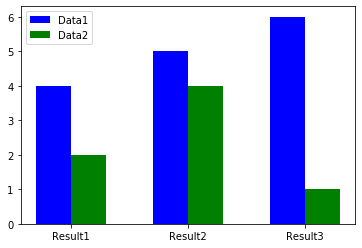

In [342]:
x1 = [1, 2, 3]
y1 = [4, 5, 6]

x2 = [1.3, 2.3, 3.3]
y2 = [2, 4, 1]

label_x = ['Result1', 'Result2', 'Result3']

# 1つ目の棒グラフ
plt.bar(x1, y1, color='b', width=0.3, label='Data1', align="center")

# 2つ目の棒グラフ
plt.bar(x2, y2, color='g', width=0.3, label='Data2', align="center")

# 凡例
plt.legend(loc=2)

# X軸の目盛りを置換
plt.xticks([1.15, 2.15, 3.15], label_x)
plt.show()

In [370]:
import numpy as np
from scipy import stats
A = np.array(simi_no)
B = np.array(simi_cs)
stats.ttest_rel(A, B)

Ttest_relResult(statistic=-3.520064664061038, pvalue=0.00043335949404941804)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.15877683720748895,
 0.14625448482542613,
 0.06262242910851494,
 0.0,
 0.08199200616907877,
 0.11803342130469506,
 0.0,
 0.09901475429766744,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.20211302086361083,
 0.0,
 0.0,
 0.1143323900950059,
 0.058823529411764705,
 0.04950737714883372,
 0.08157355826841604,
 0.04356068418690322,
 0.0,
 0.04667600280093366,
 0.04950737714883372,
 0.0,
 0.0,
 0.05423261445466404,
 0.0700140042014005,
 0.0,
 0.0,
 0.05716619504750295,
 0.12126781251816648,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05716619504750295,
 0.11803342130469506,
 0.10585122480499262,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.08574929257125441,
 0.0,
 0.0,
 0.0,
 0.0,
 0.18333969940564224,
 0.18333969940564224,
 0.0,
 0.0,
 0.05564148840746571,
 0.0,
 0.04756514941544941,
 0.0,
 0.0,
 0.07312724241271307,
 0.15877683720748895,
 0.08084520834544433,
 0.07312724241271307,
 0.07669649888473704,
 0.09513029883089882,
 0.04950737714883372,
 0.19672236884115843,
 0.0529256124

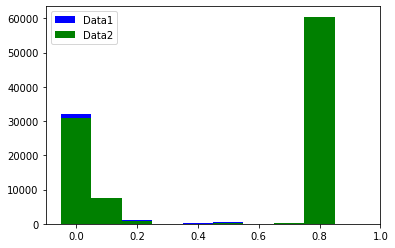

In [401]:
x1 = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
y1 = [0]*len(x1)

x2 = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
y2 = [0]*len(x2)

c = collections.Counter(simi_cs)
for i in range(len(c)):
    y1[int(c.most_common()[i][0]*10)-1] = c.most_common()[i][1]*10
    
c = collections.Counter(simi_no)
for i in range(len(c)):
    y2[int(c.most_common()[i][0]*10)-1] = c.most_common()[i][1]*10



label_x = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

# 1つ目の棒グラフ
plt.bar(x1, y1, color='b', width=0.1, label='Data1', align="center")

plt.bar(x2, y2, color='g', width=0.1, label='Data2', align="center")

# 凡例
plt.legend(loc=2)

# X軸の目盛りを置換
#plt.xticks([1.15, 2.15, 3.15], label_x)
plt.xlim(-0.1,1)
plt.show()

C:\Users\81906\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  from ipykernel import kernelapp as app
C:\Users\81906\anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
C:\Users\81906\anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


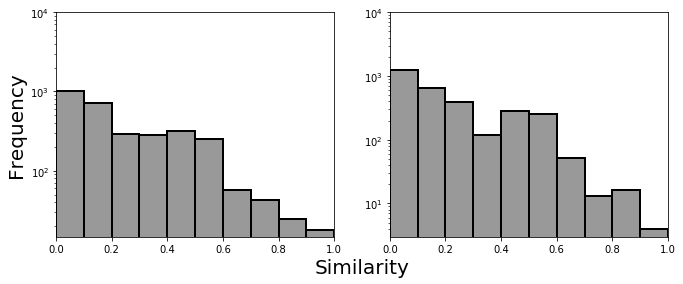

In [944]:
#頻度分布（cs）
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 100, 15

fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
plt.subplots_adjust(left=0.1, right=0.95, bottom=0.2, top=0.98)

axL.hist(simi_no[0:4000], linewidth=2,color="0.6", ec='black', log=True)
#axL.set_title('Not active activation from current page')
axL.set_xlabel('Similarity', fontsize=20, position=(1.1, 0))
axL.set_ylabel('Frequency', fontsize=20)
axL.set_xlim(0, 1)
axL.set_ylim(0,10000)


axR.hist(simi_cs[0:4000], linewidth=2,color="0.6", ec='black', log=True)
#axR.set_title('Active activation from current page')
#axR.set_xlabel('similarity')
#axR.set_ylabel('frequency')
axR.set_xlim(0, 1)
axR.set_ylim(0,10000)

fig.show()
#fig.savefig("C:/Users/81906/Documents/simi.eps")

C:\Users\81906\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


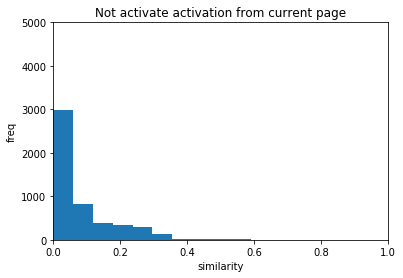

In [311]:
#頻度分布（cs）
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 100, 15

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(simi)
ax.set_title('Not activate activation from current page')
ax.set_xlabel('similarity')
ax.set_ylabel('freq')
ax.set_xlim(0,1)
ax.set_ylim(0,5000)
fig.show()
fig.savefig("C:/Users/81906/Documents/actr6/actr6/distr-model/logs/result_img/result2")

C:/Users/81906/Documents/results_normal/tmp\results2.txt
C:/Users/81906/Documents/results_normal/tmp\results3.txt
C:/Users/81906/Documents/results_normal/tmp\results4.txt
C:/Users/81906/Documents/results_normal/tmp\results6.txt
C:/Users/81906/Documents/results_normal/tmp\results7.txt
C:/Users/81906/Documents/results_normal/tmp\results9.txt
24
1002


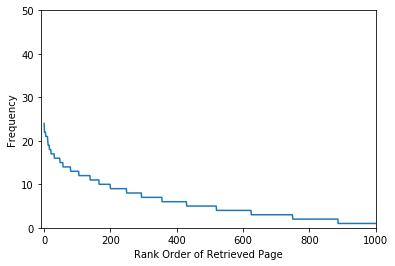

In [785]:
#頻度分布（cs）
import glob
import collections
import re
from matplotlib import pyplot as plt
%matplotlib inline

ls_n = []
files = glob.glob("C:/Users/81906/Documents/results_normal/tmp/*.txt")
for file in files:
    print(file)
    with open(file, mode="r", encoding='utf8') as f:
        for line in f.readlines():
            line_split = re.split( " |t|T", line)
            if len(line_split) > 2 and line_split[2] != "noise":
                ls_n.append(line_split[2])

c = collections.Counter(ls_n)
count = 0
ls_n2 = []
for i in range(len(c)):
    ls_n2.append(c.most_common()[i][1])
plt.ylim(0,50)
plt.xlim(-10,1000)
plt.ylabel("Frequency")
plt.xlabel("Rank Order of Retrieved Page")
plt.plot(ls_n2)
print(max(ls_n2))
#plt.savefig("result1")
print(len(c))

23
1027


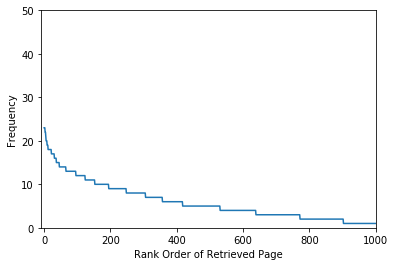

In [786]:
#頻度分布（cs）
import glob
import collections
import re
from matplotlib import pyplot as plt
%matplotlib inline

ls_n = []
files = glob.glob("C:/Users/81906/Documents/results_cs/tmp/*.txt")
for file in files:
    with open(file, mode="r", encoding='utf8') as f:
        for line in f.readlines():
            line_split = re.split( " |t|T", line)
            if len(line_split) > 2 and line_split[2] != "noise":
                ls_n.append(line_split[2])

c = collections.Counter(ls_n)
count = 0
ls_n3 = []
for i in range(len(c)):
    ls_n3.append(c.most_common()[i][1])
plt.ylim(0,50)
plt.xlim(-10,1000)
plt.ylabel("Frequency")
plt.xlabel("Rank Order of Retrieved Page")
plt.plot(ls_n3)
print(max(ls_n3))
#plt.savefig("result1")
print(len(c))

22
915


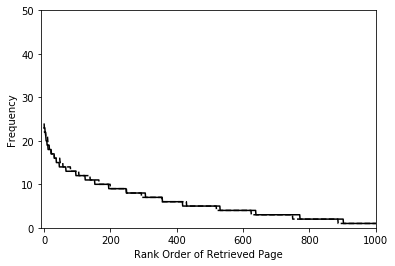

In [788]:
#頻度分布（cs）
import glob
import collections
import re
from matplotlib import pyplot as plt
%matplotlib inline

ls = []
p = 0
files = glob.glob("C:/Users/81906/Documents/results_cs/*.txt")
for file in files:
    with open(file, mode="r", encoding='utf8') as f:
        for line in f.readlines():
            line_split = re.split( " |t|T", line)
            if len(line_split) > 2:
                ls.append(line_split[2])


c = collections.Counter(ls)
count = 0
ls2 = []
for i in range(len(c)):
    ls2.append(c.most_common()[i][1])
plt.ylim(0,50)
plt.xlim(-10,1000)
plt.ylabel("Frequency")
plt.xlabel("Rank Order of Retrieved Page")
#plt.plot(ls2,color="black")
plt.plot(ls_n2, color="black", linestyle="dashed")
plt.plot(ls_n3, color="black")
print(max(ls2))
#plt.savefig("result1")
print(len(c))

In [667]:
import random
import json

json_open = open("C:/Users/81906/Documents/create-chunk/history/historyk.json",mode="r",encoding='utf8')
json_load = json.load(json_open)
target = str(round(random.uniform(1000,1342)))+"t"
for i in range(len(json_load)):
    if json_load[i]["url"] == "http://sig-alst.jp/sig-alst/?page_id=7":
        print(json_load[i]["id"])
        target= json_load[i]["id"]
        break    
print(target)
with open("C:/Users/81906/Documents/actr6/actr6/distr-model/param/img-dm.lisp",mode="w",encoding='utf8') as f2:
    f.read

with open("C:/Users/81906/Documents/actr6/actr6/distr-model/param/tmp/img-dm_ori.lisp",mode="r",encoding='utf8') as f:
    with open("C:/Users/81906/Documents/actr6/actr6/distr-model/param/img-dm.lisp",mode="a",encoding='utf8') as f2:
        ls = []
        for line in f.readlines():
            if not target in line:
                f2.write(line)
                
                
with open("C:/Users/81906/Documents/actr6/actr6/distr-model/param/img-param.lisp",mode="w",encoding='utf8') as f2:
    f.read

with open("C:/Users/81906/Documents/actr6/actr6/distr-model/param/tmp/img-param_ori.lisp",mode="r",encoding='utf8') as f:
    with open("C:/Users/81906/Documents/actr6/actr6/distr-model/param/img-param.lisp",mode="a",encoding='utf8') as f2:
        ls = []
        for line in f.readlines():
            if not target in line:
                f2.write(line)

1117
1117
